### Chocolate_Sales 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

chocolate_df = pd.read_csv('../data/chocolate_sales.csv')
chocolate_df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184
...,...,...,...,...,...,...
3277,Karlen McCaffrey,Australia,Spicy Special Slims,17/05/2024,"$5,303.58",354
3278,Jehu Rudeforth,USA,White Choc,07/06/2024,"$7,339.32",121
3279,Ches Bonnell,Canada,Organic Choco Syrup,26/07/2024,$616.09,238
3280,Dotty Strutley,India,Eclairs,28/07/2024,"$2,504.62",397


In [2]:
chocolate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


In [3]:
chocolate_df.describe()

,Boxes Shipped
count,3282.000000
mean,164.666971
std,124.024736
min,1.000000
25%,71.000000
50%,137.000000
75%,232.000000
max,778.000000


### 데이터 전처리

In [4]:
chocolate_df.dtypes

Sales Person     object
Country          object
Product          object
Date             object
Amount           object
Boxes Shipped     int64
dtype: object

In [5]:
chocolate_df['Date'] = pd.to_datetime(chocolate_df['Date'], format='%d/%m/%Y')

In [6]:
chocolate_df['Year'] = chocolate_df['Date'].dt.year
chocolate_df['Month'] = chocolate_df['Date'].dt.month
chocolate_df['Day'] = chocolate_df['Date'].dt.day

In [7]:
chocolate_df['Amount'] = pd.to_numeric(chocolate_df['Amount'].replace({'\$':'', ',':''}, regex=True))

In [8]:
chocolate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   3282 non-null   object        
 1   Country        3282 non-null   object        
 2   Product        3282 non-null   object        
 3   Date           3282 non-null   datetime64[ns]
 4   Amount         3282 non-null   float64       
 5   Boxes Shipped  3282 non-null   int64         
 6   Year           3282 non-null   int32         
 7   Month          3282 non-null   int32         
 8   Day            3282 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(3)
memory usage: 192.4+ KB


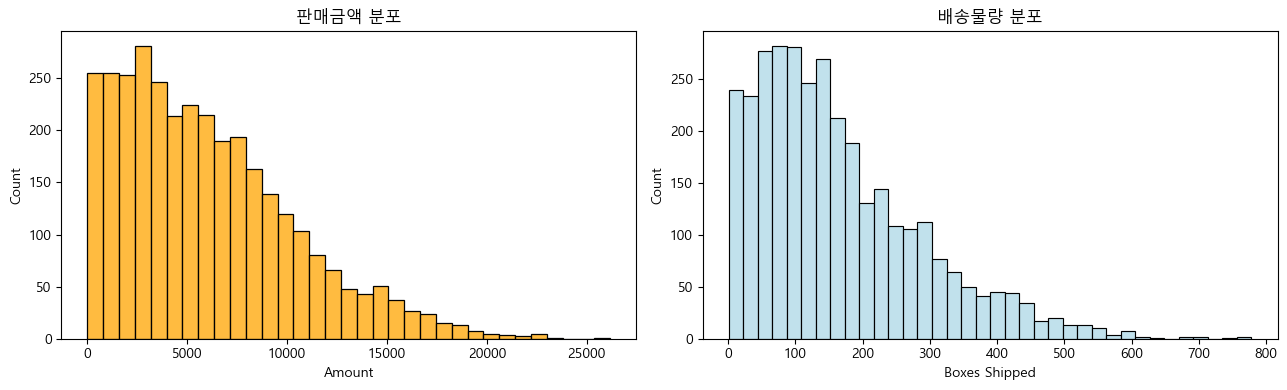

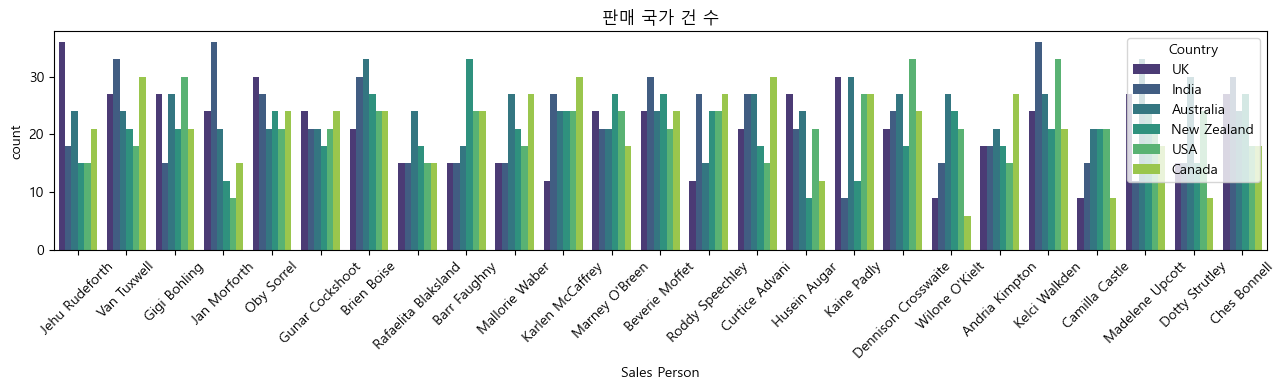

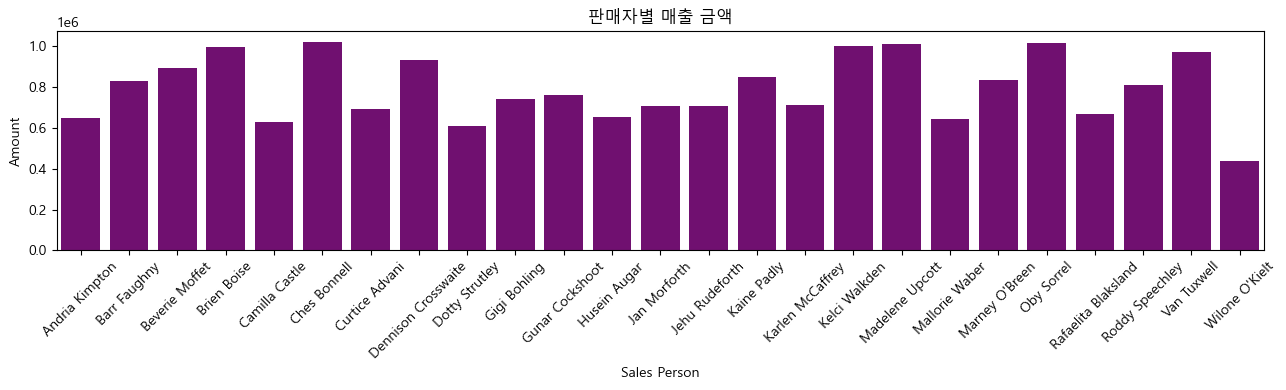

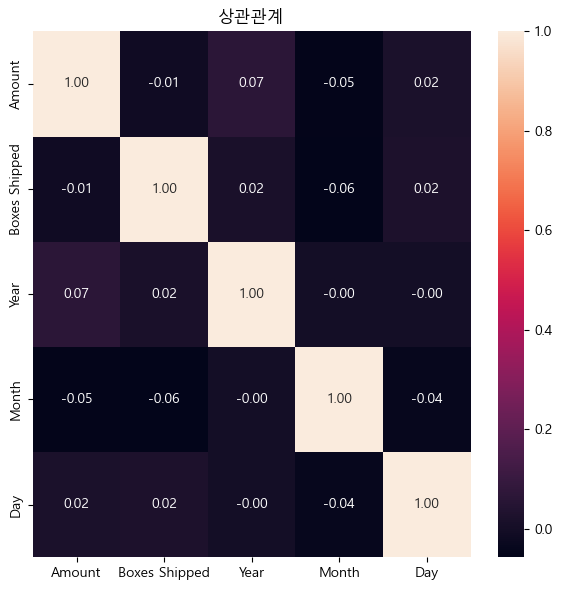

In [9]:
from matplotlib import rc
rc('font', family='Malgun Gothic')

# histogram for 'Amout', 'Boxed Shipped'
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
sns.histplot(data=chocolate_df, x='Amount', kde=False, color='orange')
plt.title('판매금액 분포')

plt.subplot(1, 2, 2)
sns.histplot(data=chocolate_df, x='Boxes Shipped', color='lightblue')
plt.title('배송물량 분포')
plt.tight_layout()
plt.show()

# countplot for 'Sales Person', 'Country'
plt.figure(figsize=(13, 4))
sns.countplot(data=chocolate_df, x='Sales Person', hue='Country', palette='viridis')
plt.title('판매 국가 건 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(13, 4))
sns.barplot(chocolate_df.groupby(by='Sales Person')['Amount'].agg('sum'), color='purple')
plt.title('판매자별 매출 금액')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(chocolate_df[chocolate_df.select_dtypes(exclude=['object','datetime64[ns]']).columns.to_list()].corr(), annot=True, fmt='.2f')
plt.title('상관관계')
plt.tight_layout()
plt.show()

In [10]:
chocolate_df.pivot_table(index='Sales Person', columns='Product', values='Amount', aggfunc=['sum'], fill_value=0, margins=True)

sum                               \
Product             50% Dark Bites 70% Dark Bites 85% Dark Bars   
Sales Person                                                      
Andria Kimpton            76987.66       33335.29      42478.90   
Barr Faughny              90919.36           0.00      73891.72   
Beverie Moffet            18152.63        8663.80      95242.73   
Brien Boise                   0.00       42811.96      90691.46   
Camilla Castle            49491.66       49899.72      96222.97   
Ches Bonnell              35965.96       24402.24      48106.53   
Curtice Advani            43827.67       14351.00      21442.02   
Dennison Crosswaite       22280.17       20236.87      70869.83   
Dotty Strutley             9789.08        4046.85      33014.38   
Gigi Bohling              51245.95       31280.34      38263.02   
Gunar Cockshoot           95800.93           0.00      22940.68   
Husein Augar              45435.93       37504.95       1191.95   
Jan Morforth              28274.45       36026.49      15012.32   
Jehu Rudeforth            40228.02       17552.68      40452.26   
Kaine Padly               65022.00       97660.64       7167.43   
Karlen McCaffrey          42158.43       42425.84      21822.52   
Kelci Walkden             19779.29       11485.85      12997.31   
Madelene Upcott           23119.02      105519.12      28970.33   
Mallorie Waber            25842.02           0.00      45489.15   
Marney O'Breen            13079.57       26612.63      11095.97   
Oby Sorrel                23348.98       20454.26      61224.17   
Rafaelita Blaksland       42194.67        2243.92          0.00   
Roddy Speechley           73611.24        4677.06      28395.73   
Van Tuxwell              105412.56       46154.71      42329.94   
Wilone O'Kielt            45692.10           0.00       5954.92   
All                     1087659.35      677346.22     955268.24   

                                                              \
Product             99% Dark & Pure After Nines Almond Choco   
Sales Person                                                   
Andria Kimpton              3701.64     9629.23     31199.46   
Barr Faughny               26580.86    59504.48     19606.73   
Beverie Moffet             11009.36        0.00     18108.99   
Brien Boise                83287.84    18046.53     22426.63   
Camilla Castle             22918.01        0.00         0.00   
Ches Bonnell                1495.71    18169.55     37227.52   
Curtice Advani             56046.19    69280.35     24960.42   
Dennison Crosswaite        69617.03        0.00     37389.39   
Dotty Strutley             76432.94      822.48     54749.33   
Gigi Bohling                2576.53    49294.77     52685.13   
Gunar Cockshoot            25401.76    53465.91     33379.06   
Husein Augar               39227.58   101585.00     27004.95   
Jan Morforth               29991.19    35066.25     46070.13   
Jehu Rudeforth             48195.65    27259.95     32693.93   
Kaine Padly                 4040.98   100891.95     33288.67   
Karlen McCaffrey           34410.48     7314.46     64859.53   
Kelci Walkden              68725.40    84872.36     43341.15   
Madelene Upcott            47831.63    14680.16     57187.69   
Mallorie Waber                 0.00     1552.70     60517.07   
Marney O'Breen             73864.48    28864.54     25187.33   
Oby Sorrel                 89451.36     7488.71     40470.87   
Rafaelita Blaksland        65921.38    18890.98     10776.57   
Roddy Speechley            24998.91    34366.39     22801.67   
Van Tuxwell                54306.54    46416.41     65469.13   
Wilone O'Kielt                 0.00    49752.51     29053.30   
All                       960033.45   837215.67    890454.65   

                                                              \
Product             Baker's Choco Chips Caramel Stuffed Bars   
Sales Person                                                   
Andria Kimpton                  1024.0

In [11]:
chocolate_df = chocolate_df.drop(columns='Date')
chocolate_df = pd.get_dummies(data=chocolate_df, columns=['Sales Person','Country','Product'], drop_first=True)

In [12]:
chocolate_df.describe()

,Amount,Boxes Shipped,Year,Month,Day
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,6030.338775,164.666971,2023.000000,4.576782,15.563985
std,4393.980200,124.024736,0.816621,2.315759,8.621738
min,7.000000,1.000000,2022.000000,1.000000,1.000000
25%,2521.495000,71.000000,2022.000000,3.000000,8.000000
50%,5225.500000,137.000000,2023.000000,5.000000,15.000000
75%,8556.842500,232.000000,2024.000000,7.000000,23.000000
max,26170.950000,778.000000,2024.000000,8.000000,31.000000


In [13]:
X = chocolate_df.drop(columns='Amount')
y = chocolate_df['Amount']

In [14]:
X.shape, y.shape

((3282, 54), (3282,))

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

rfr = RandomForestRegressor()

parameters = {'n_estimators':[50,100,200], 'max_features':['sqrt', 'log2', None]}
gscv = GridSearchCV(rfr, param_grid=parameters, cv=5)
gscv.fit(X_train, y_train)

# GridSearchCV 결과확인
best_model = gscv.best_estimator_
y_pred = best_model.predict(X_test)

# 최종 평가
print(f"최적 파라미터: {gscv.best_params_}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")

최적 파라미터: {'max_features': None, 'n_estimators': 200}
R2 Score: 0.7256
MSE: 4618137.5343


In [16]:
from lightgbm import LGBMRegressor

lgbmr = LGBMRegressor()

parameters = {'learning_rate': [0.05, 0.1, 0.15, 0.2], 'num_leaves':[20, 30, 50, 70]}

gscv = GridSearchCV(lgbmr, parameters, cv=5)
gscv.fit(X_train, y_train)

best_model = gscv.best_estimator_
y_pred = best_model.predict(X_test)

# 4. 성능 평가
print(f"최적 파라미터: {gscv.best_params_}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 2100, number of used features: 54
[LightGBM] [Info] Start training from score 6098.332050
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 2100, number of used features: 54
[LightGBM] [Info] Start training from score 6088.815587
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of 